In [1]:
def DeleteTrash(pathTxtFile):
    with open (pathTxtFile, 'r') as f:
        old_data = f.read()
        new_data = old_data.replace('[', '')
        new_data = new_data.replace(']', '')
        new_data = new_data.replace(',', '')
        new_data = new_data.replace(';', '')
        new_data = new_data.replace('(', '')
        new_data = new_data.replace(')', '')
    with open (pathTxtFile, 'w') as f:
        f.write(new_data)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import statistics

FindCord = np.loadtxt(r"./BallDetectorLogMomentWithCameraMatrix.txt")
BlenderCord63 = np.loadtxt(r"./LogBlenderCoord63video.txt", delimiter=',')



In [3]:
def paint(TrueCord = FindCord, FindCord = BlenderCord63):
    plt.plot(FindCord, label = "Find")
    plt.plot(TrueCord, label = "True")
    plt.grid()
    plt.legend()
    plt.show()


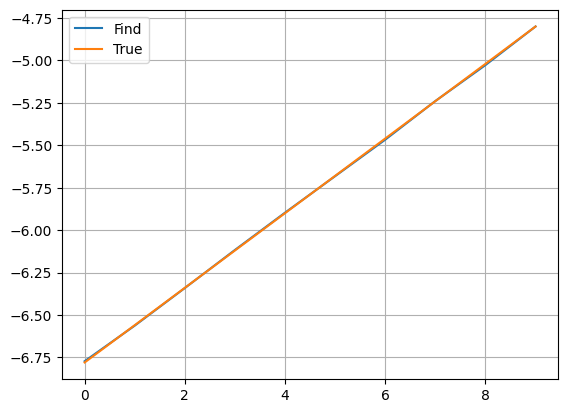

In [4]:
w = interact(paint(BlenderCord63[:10,0], FindCord[:10,0]) )

In [5]:
#Ball kalman You
import numpy as np


BlenderCord63 = np.loadtxt(r"./LogBlenderCoord63video.txt", delimiter=',')
FindCord = np.loadtxt(r"./BallDetectorLogMomentWithCameraMatrix.txt")
dt = 1.0/25.0
vx_Find = np.diff(FindCord[:,0]) / dt
vx_True = np.diff(BlenderCord63[:,0]) /dt


ball_coords = np.column_stack((FindCord[:(len(FindCord)-1 ),0], vx_Find))
#ball_coords = ball_coords[:32,:]
#ball_coords = np.array( [ FindCord[1:,0] ], [vx_Find])


In [6]:

# Initial Parameters
F = np.array([[1, dt], [0, 1]])
B = np.array([[(dt**2)/2], [dt]])
H = np.array([[1, 0], [0, 1]])
Q = np.array([[0.1, 0.1], [0.1, 0.1]])
R = np.array([[1, 0], [0, 1]])
#x = np.array([[0], [0]])
x = np.array([[ FindCord [0,0] ], [ vx_Find[0] ]])

P = np.array([[1, 0], [0, 1]])
filtered_coords = []
# Main loop
for i in range(len(ball_coords)):
    z = np.array([[ball_coords[i][0]], [ball_coords[i][1]]])
    u = np.array([[0]])
    
    # Prediction step
    x_hat = np.dot(F, x) + np.dot(B, u)
    P_hat = np.dot(np.dot(F, P), np.transpose(F)) + Q
    
    # Update step
    y = z - np.dot(H, x_hat)
    S = np.dot(np.dot(H, P_hat), np.transpose(H)) + R
    K = np.dot(np.dot(P_hat, np.transpose(H)), np.linalg.inv(S))
    x = x_hat + np.dot(K, y)
    P = np.dot((np.identity(2) - np.dot(K, H)), P_hat)
    
    # Save filtered coordinates
    filtered_coords.append([x[0][0], x[1][0]])

In [7]:
filtered_coords2 = np.array(filtered_coords)
print (filtered_coords2.shape)

(62, 2)


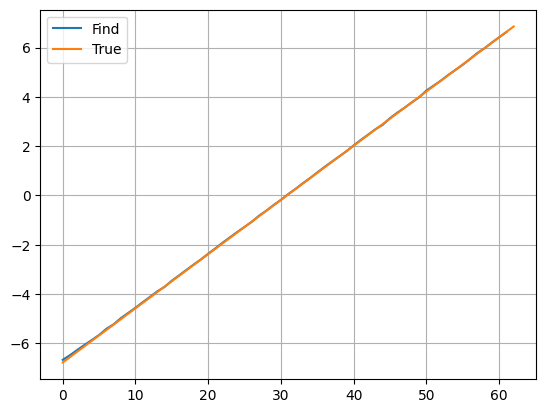

In [8]:
Kal = interact(paint(BlenderCord63[:,0], filtered_coords2[:,0] ) )

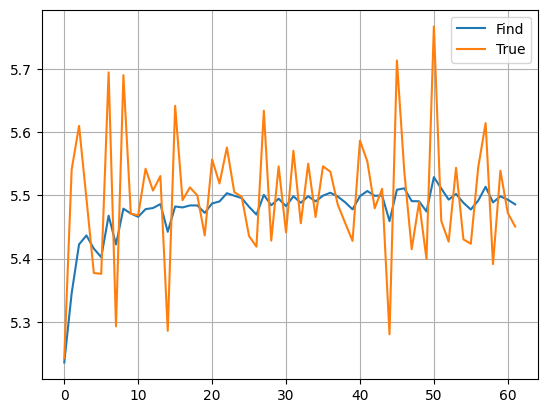

In [9]:
KalVel = interact(paint(vx_Find, filtered_coords2[:,1] ) )

# Big predict

x Real cordinate mean: 
0.00024317110863191665
Statistics stdev:   0.003104331855279067  error x
-------------------------------------------------------------------
mean x abs: 
0.00241740015816735
For Kalman 
 -----------------
x Real cordinate mean KaLMAN: 
0.015807521410437047
Statistics stdev kALMAN :   0.02196874888520542  error x
-------------------------------------------------------------------
mean x abs Kalman: 
0.019066985024266007


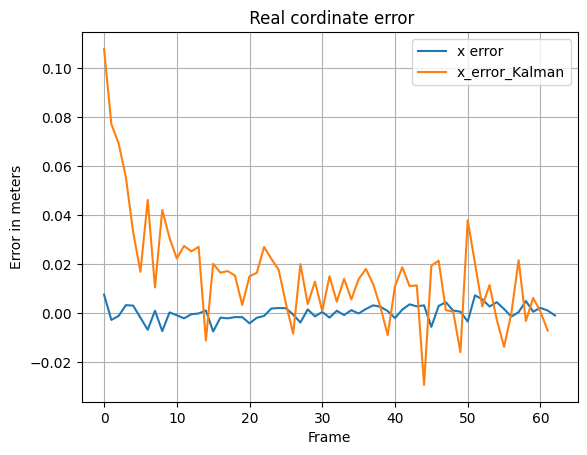

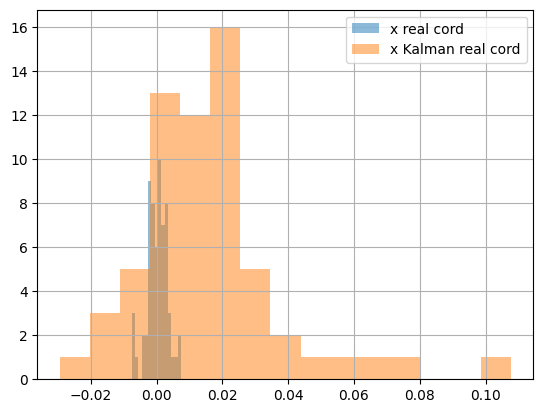

In [10]:
# Оценка новой точноси
draw = True

xErrorFindCord = FindCord[:,0] - BlenderCord63[:,0]
xErrorKalmanCord = filtered_coords2[:,0] - BlenderCord63[:len(filtered_coords2) ,0]
print ("x Real cordinate mean: ")
print (np.mean(xErrorFindCord))

#print ("Statistics mean:  ", statistics.mean(xErrorValuesPx), " error in px " ) 
print ("Statistics stdev:  ", statistics.stdev(xErrorFindCord), " error x" )

print("-------------------------------------------------------------------")
print("mean x abs: " )
print (np.mean(abs(xErrorFindCord)) ) 

print ("For Kalman \n -----------------")

print ("x Real cordinate mean KaLMAN: ")
print (np.mean(xErrorKalmanCord))

print ("Statistics stdev kALMAN :  ", statistics.stdev(xErrorKalmanCord), " error x" )

print("-------------------------------------------------------------------")
print("mean x abs Kalman: " )
print (np.mean(abs(xErrorKalmanCord)) ) 

if draw:
    plt.plot(xErrorFindCord, label = 'x error')
    plt.plot (xErrorKalmanCord, label = 'x_error_Kalman' )
    plt.legend()
    plt.xlabel('Frame')
    plt.ylabel('Error in meters')
    plt.title(" Real cordinate error")
    plt.grid()
    plt.show()


    plt.hist(xErrorFindCord,alpha = 0.5, bins=  15, label="x real cord")
    plt.hist(xErrorKalmanCord, alpha = 0.5, bins=  15, label="x Kalman real cord")
    plt.legend()
    plt.grid()
    plt.show()


In [13]:
filtered_coords2[:,1]

array([5.23598554, 5.34530334, 5.42256223, 5.43668876, 5.4158549 ,
       5.40229073, 5.46789409, 5.42246496, 5.47898284, 5.47129297,
       5.4661467 , 5.47824708, 5.4799685 , 5.48620396, 5.44246941,
       5.48245503, 5.4809132 , 5.48407806, 5.48407677, 5.47234531,
       5.4872138 , 5.49036767, 5.503384  , 5.49938858, 5.49568134,
       5.48191687, 5.46965264, 5.50077155, 5.48433521, 5.49478474,
       5.48297535, 5.49851003, 5.48833512, 5.49862721, 5.49046585,
       5.4995234 , 5.50417456, 5.49814571, 5.48904214, 5.47788767,
       5.49871486, 5.50684472, 5.49925753, 5.49977293, 5.45924889,
       5.50895281, 5.51107324, 5.49087719, 5.49062826, 5.47453454,
       5.52879989, 5.51085968, 5.49327986, 5.50222092, 5.48825371,
       5.47765713, 5.49179519, 5.51356356, 5.48888296, 5.49848331,
       5.49312943, 5.48576089])

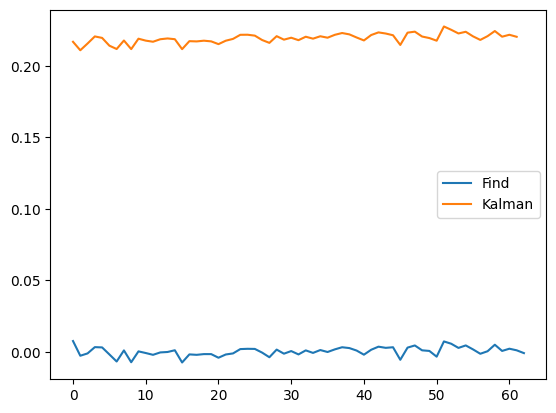

In [14]:

CalcLoc = []
for i in range(len (FindCord[:,0])-1 ):
    CalcLoc.append( FindCord[i,0] + filtered_coords2[i,1]*dt)
    
xErrorFindCord = FindCord[:,0] - BlenderCord63[:,0]

plt.plot (xErrorFindCord, label = 'Find')
plt.plot (CalcLoc - BlenderCord63[:-1,0], label = 'Kalman')
plt.legend()
plt.show()

plt.plot(CalcLoc, label = "CalcLoc")
plt.plot(FindCord[:,0], label = "FindCord")
plt.plot (BlenderCord63, label ='True')
plt.legend()
plt.grid()
plt.show()

In [12]:

F = np.array([[1, dt*30], [0, 1]])
x_hat = np.dot(F, x) + np.dot(B, u)
P_hat = np.dot(np.dot(F, P), np.transpose(F)) + Q